# Phase 2- INFO 2950 Project

## Potential Research Questions 
(Listed in perceived order of significance)

### - What do guest reviews tell us about the population's preferred listing type?
### - Do the minimum number of nights on a listing relate to price/availibility?
Note: According to New York State Law, it is illegal to rent out a permanent residence dwelling for less than 30 days without the owner, resident present. Airbnb is frequently under fire for letting their hosts do exactly so.
### - Do hosts who have been with Airbnb longer have better reviews?
### - Do hosts with mutliple listings keep them concentrated in one location or spread out across the city?

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load cleaned data
airbnb = pd.read_csv("/Users/eliseburdette/Desktop/airbnb.csv")
airbnbrev = pd.read_csv("/Users/eliseburdette/Desktop/airbnbreviews.csv")
#airbnb = pd.read_csv("airbnb.csv")
#airbnbrev = pd.read_csv("airbnbreviews.csv")

# Data Description

- This data is a collection of over 45,000 observed Airbnb listings for New York City. The attributes include: the listing and its host's id numbers; the date that the host joined Airbnb; the count of each host's listings; the borough in which the listing is located and its latitude/longitude; the property type and room type of the listing; how many guests that the listing may accomodate, including bedroom and bed count; the price of the listing; the minimum number of nights that a guest must stay; the maximum number of nights that a guest may stay; how many days over the last 30, 60, 90, and 365 days that the host has made the listing available for rent; the dates of the first and latest reviews; the total guest review score; guest review scores based on cleanliness, location, and value; and the averaged number of reviews per month. <br>
- The dataset was created by Inside Airbnb, an independent project to add data to the debates surrounding the ethicality and legality of Airbnb and its methods. Inside Airbnb is not affiliated with Airbnb, but sources all of its data from publicly available information from the Airbnb website. The dataset was created to answer fundamental questions about "how Airbnb is really being used in cities around the world." Inside Airbnb seeks to make Airbnb's data more publicly accessible and scrutinizable so that the public's understanding about the company is not solely dependent upon Airbnb's claims. 
- Inside Airbnb is personally funded by Murray Cox, an Australian community activist and technologist who currently acts as the founder and chief data activist for Inside Airbnb. The dataset and collection is also funded by community donations. Murray Cox personally describes Airbnb as an "activist platform... to help cities and communities respond to the threat of Airbnb on residential neighborhoods throughout the world." Inside Airbnb is not endorsed by any of Airbnb's competitors.
- All data that was observed came straight from Airbnb's publicly available data, including current listings, the availability calendar for 365 days in the future, and reviews for each listing. Thus, the data that Airbnb chooses to make publicly available highly influences the data recorded by Inside Airbnb. Inside Airbnb claims all data is verified. Inside Airbnb's data is a snapshot of listings available at a particular time. This means that a listing is recorded based on when Inside Airbnb observes it on the Airbnb site, not as soon as the listing is made. There is likely some lag between the two.
- Inside Airbnb disclaims that they have already done some verification, cleansing, and aggregation on the data that they provide. It uses an occupancy model called the "San Francisco Model," which can be used to calculate and estimate other metrics not provided by the Airbnb site. The methodology of the model is explicitly outlined under Inside Airbnb's disclaimers. Our own preprocessing included deleting attributes that were not relevant to our research questions (like a listing's unique name or description made by the host). We also created a second data frame which only included listings with at least one review. This allowed us to drop nearly 10,000 observations that would not contribute to any analysis about guest reviews.
- All data was collected from Airbnb's publicly available listings. Hosts creating the listings may or may not be unaware of Inside Airbnb's data collection, but all listings are uploaded and specified voluntarily by hosts in accordance with Airbnb's policies. To upload a listing, hosts agree that Airbnb will make the listing data publicly available, which hosts likely believe is to primarily find guests.
- Raw Data Cornell Box Link: https://cornell.box.com/s/q60hl086lws4nro5pf8snqwc7pab7q5w

# Data Limitations


- Inside Airbnb collects their directly data from Airbnb. The Airbnb calendar for a listing does not differentiate between a booked night and a night made unavailable by the host, so Inside Airbnb has to count bookings an unavailable nights. This understates the availability attributes of our data, since a popular listing that is actually booked will appear to be unavailable. A listing that has a monthly availability of 10 should indicate that the host is only renting out the unit for 10 days out of a month. However, a listing that the host is renting for 30 days per month but is already booked for 20 days will show the same monthly availability of 10. This means we have to take the availability attributes with a grain of salt and perhaps cross reference to other attributes before making any conclusions about the booking history of a listing. The availabilty metric also depends on hosts keeping their listings' calendars updated. 
- Leaving reviews is optional for guests, which means that if review count is being used as an indicator for booking activity it will not be equal to the number of actual bookings. We also need to recognize that because reviews are optional and not all guests leave one, there is a lot of missing data in that regard. Say listings A and B both had ten bookings. If A had only one guest leave a 7 point review and the other nine guests would have left a 10 point review but chose not to, then listing A would show a total review score of 7. If the other nine guests had left a review though, its total score would have been 9.7. If listing B had ten 8 point reviews, on the other hand, then its total review score would be 8. If we were to compare listing A and B based on the data's total review score, then we would be misled into assuming that listing B was favorable to A. The data is clearly limited in the sense that we only know the ratings of the people who took the time to leave a review for a listing, but that this is not guaranteed to be the average experience of every guest. All attributes involving reviews are affected by this limitation, but since we cannot track down missing reviews, we will not know to what extent. 

# Exploratory data analysis

### Determining what makes up a listing type

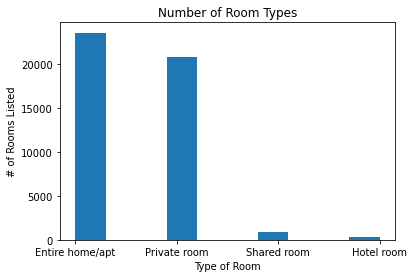

In [2]:
#pyplot.legend()
plt.hist(airbnb["room_type"])
plt.title('Number of Room Types')
plt.xlabel('Type of Room')
plt.ylabel('# of Rooms Listed')
plt.show()

Here we are comparing each type of room that is listed on airbnb to determine the popularity of each type of room type that is being listed. Clearly entire homes and private rooms make up the majority of listings, while shared rooms and hotel rooms are much less listed on Airbnb. We could speculate on why hotel rooms have so few listings- it may be because hotels have many more platforms on which they can advertise their rooms without having to register through Airbnb. 

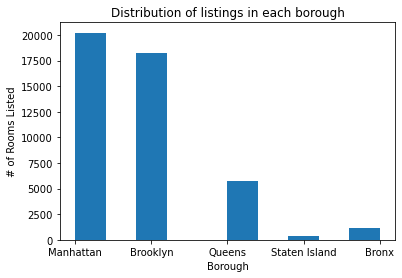

In [3]:
plt.hist(airbnb["borough"])
plt.title('Distribution of listings in each borough')
plt.xlabel('Borough')
plt.ylabel('# of Rooms Listed')
plt.show()

Here we are comparing the number of listings per borough to determine which borough has the most amount of listings. Manhattan clearly has the most listings with Brooklyn closely behind. We could delve further into this to speculate on why these boroughs are the most listed; do these boroughs have more listings simply to match higher demand? Does this indicate that Staten Island, the borough with the fewest listings, has the least amount of demand? This might be interesting to further analyze in future phases.

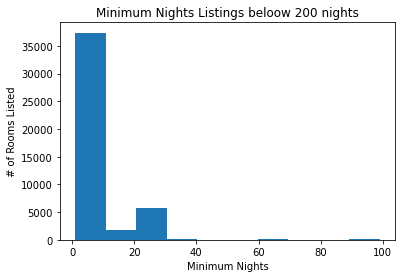

In [4]:
airbnb_nights = airbnb [ airbnb["minimum_nights"] < 100]
plt.hist(airbnb_nights["minimum_nights"])
plt.title('Minimum Nights Listings below 200 nights')
plt.xlabel('Minimum Nights')
plt.ylabel('# of Rooms Listed')
plt.show()

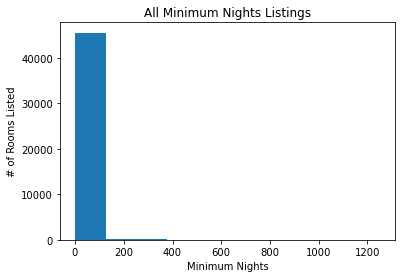

In [5]:
plt.hist(airbnb["minimum_nights"])
plt.title('All Minimum Nights Listings')
plt.xlabel('Minimum Nights')
plt.ylabel('# of Rooms Listed')
plt.show()

Here are minimum nights compared among all the boroughs. There are some outliers which is why there are two charts. We can see clearly that a grand majority of listings have a minimum night requirement between 0 and 10 days. There appear to be relatively very few listings with a higher minimum requirement. It must then be somehow favorable to hosts to have a lower minimum nights since they set the requirement. Perhaps this could be an indication that Airbnb guests prefer to stay in New York for ten days or fewer. We will certainly perform some more in-depth searching on this. 

### Exploring Reviews Scores

Text(0, 0.5, 'Frequency of Score')

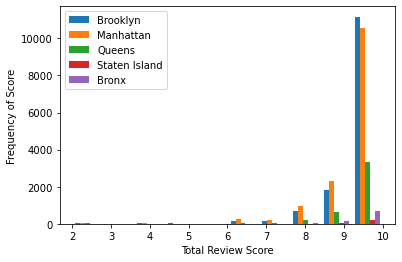

In [9]:
brooklyn = airbnbrev[airbnbrev["borough"] == "Brooklyn"]
manhattan = airbnbrev[airbnbrev["borough"] == "Manhattan"]
queens = airbnbrev[airbnbrev["borough"] == "Queens"]
staten = airbnbrev[airbnbrev["borough"] == "Staten Island"]
bronx = airbnbrev[airbnbrev["borough"] == "Bronx"]


plt.hist([brooklyn["total_review"], manhattan["total_review"],queens["total_review"],staten["total_review"],bronx["total_review"]], label=["Brooklyn", "Manhattan", "Queens", "Staten Island", "Bronx"])
plt.legend()
plt.xlabel("Total Review Score")
plt.ylabel("Frequency of Score")

This chart is a comparison of each borough and the frequency of ratings they acumulated. This also compares which borough has acumulated higher ratings than the other borough, but is not representitive of the average total review score for each borough. We can clearly see on the graph that Brooklyn has the highest frequency of highly-ranked reviews, with Manhattan closely behind. We also know, though, that Brooklyn and Manhattan both have the highest number of listings, so it naturally makes sense that they would have more reviews, period. To see the actual highest-rated borough, we will have to use a different metric other than frequency.

In [7]:
mean_brooklyn = brooklyn["total_review"].mean()
mean_manhattan = manhattan["total_review"].mean()
mean_queens = queens["total_review"].mean()
mean_staten = staten["total_review"].mean()
mean_bronx = bronx["total_review"].mean()

print(f"Brooklyn total review scores mean = {format(mean_brooklyn, '.2f')}")
print(f"Manhattan total review scores mean = {format(mean_manhattan, '.2f')}")
print(f"Queens total review scores mean = {format(mean_queens, '.2f')}")
print(f"Staten total review scores mean = {format(mean_staten, '.2f')}")
print(f"Bronx total review scores mean = {format(mean_bronx, '.2f')}")

Brooklyn total review scores mean = 9.44
Manhattan total review scores mean = 9.34
Queens total review scores mean = 9.36
Staten total review scores mean = 9.46
Bronx total review scores mean = 9.35


This is a comparison of each average total review score for each borough. Here we can see that while Brooklyn and Manhattan had the highest frequencies of high ratings, neither have the highest review score mean. That honor belongs to Staten Island, who we know has the fewest number of listings and the lowest review count. This indicates that Staten Island has few, but quality, listings which must all receive decently good reviews. Manhattan and Brooklyn, having much more listings, are likely being impacted by outlying listings that receive bad reviews. This could be delved into further by analyzing each borough's review scores separately, and may be interesting to check out in the next phase.

### Comparing Boroughs

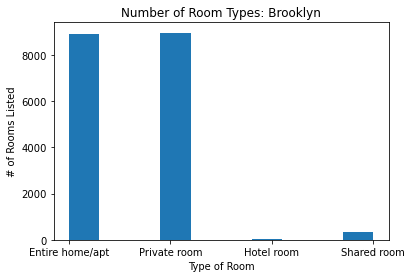

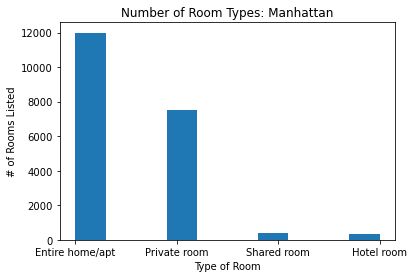

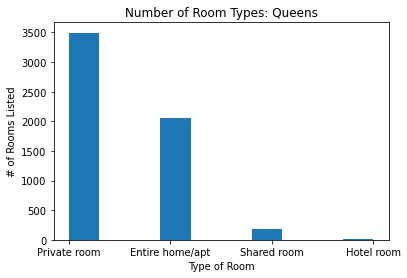

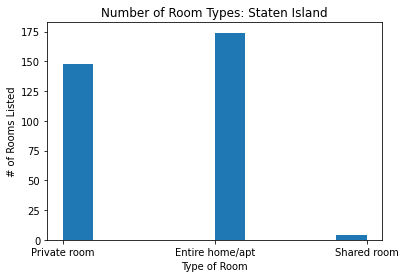

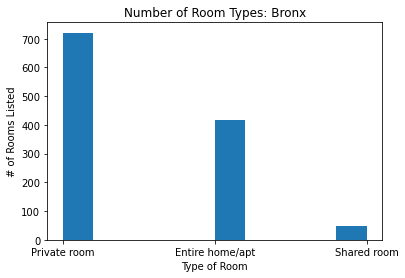

In [8]:
brooklyn_1 = airbnb[airbnb["borough"] == "Brooklyn"]
manhattan_1 = airbnb[airbnb["borough"] == "Manhattan"]
queens_1 = airbnb[airbnb["borough"] == "Queens"]
staten_1 = airbnb[airbnb["borough"] == "Staten Island"]
bronx_1 = airbnb[airbnb["borough"] == "Bronx"]

plt.hist(brooklyn_1["room_type"])
plt.title('Number of Room Types: Brooklyn')
plt.xlabel('Type of Room')
plt.ylabel('# of Rooms Listed')
plt.show()

plt.hist(manhattan_1["room_type"])
plt.title('Number of Room Types: Manhattan')
plt.xlabel('Type of Room')
plt.ylabel('# of Rooms Listed')
plt.show()

plt.hist(queens_1["room_type"])
plt.title('Number of Room Types: Queens')
plt.xlabel('Type of Room')
plt.ylabel('# of Rooms Listed')
plt.show()

plt.hist(staten_1["room_type"])
plt.title('Number of Room Types: Staten Island')
plt.xlabel('Type of Room')
plt.ylabel('# of Rooms Listed')
plt.show()

plt.hist(bronx_1["room_type"])
plt.title('Number of Room Types: Bronx')
plt.xlabel('Type of Room')
plt.ylabel('# of Rooms Listed')
plt.show()

These histograms are all showing the differnt types of room that are listed in each borough. We need to recognize that the y-axes for each borough is scaled appropriately in accordance to its number of listings. Here we can immediately note that Staten Island and the Bronx have NO hotel room listings on Airbnb. This is unsurprising since neither borough have many hotels to begin with. Overall though, we can see that in all the boroughs, private rooms and entire homes make up a majority of listings. We can be assured that Manhattan and Brooklyn's higher number of listings aren't skewing the data too much. This also means that we can be confident in saying that hosts prefer to list private rooms and entire homes, which might indicate that guests prefer to book said rooms and/or that these rooms fetch higher prices. <br> Next we want to see if there is any patterns between log_price of a listing and the borough in which it is located. 

Text(0, 0.5, 'Log(Price) per Night in Dollars')

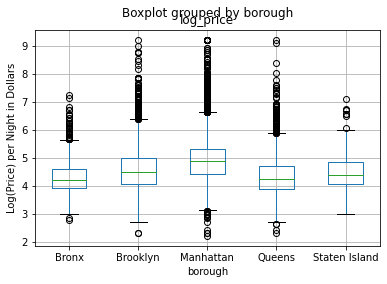

In [10]:
airbnb.boxplot(column = "log_price", by = "borough" )
plt.ylabel("Log(Price) per Night in Dollars")

The data indicates that there are many listings between the third quartile and the maximum price for each borough. We can also see that Manhattan appears to have slightly higher costs than the rest of the boroughs. It's definitely of note that Staten Island's median price appears to be on par with the other boroughs despite it having the fewest number of listings. (Although it's outliers are not nearly as high). This indicates that Staten Island's few listings are still decently pricey; this further supports the idea that Staten Island has low quantity, high quality listings.

In [11]:
for borough in airbnb['borough'].unique():
    print(borough + " Maximum Price: "+ str(airbnb["price"].where(airbnb["borough"]==borough).max()))
    print(borough + " Minimum Price: "+ str(airbnb["price"].where(airbnb["borough"]==borough).min()))
    print(" ")

Manhattan Maximum Price: 10000.0
Manhattan Minimum Price: 9.0
 
Brooklyn Maximum Price: 10000.0
Brooklyn Minimum Price: 10.0
 
Queens Maximum Price: 10000.0
Queens Minimum Price: 10.0
 
Staten Island Maximum Price: 1200.0
Staten Island Minimum Price: 20.0
 
Bronx Maximum Price: 1404.0
Bronx Minimum Price: 16.0
 


Interestingly, according to this, Manhattan, Brooklyn, and Queens all have the highest priced listings and some of the lowest priced listings as well. We decided not to remove outliers from our data because these listings are real and should not be ignored, even if they make things a little more difficult for us in the future. 

### Exploring Minimum Nights and Availability/Price

Text(0, 0.5, 'Price')

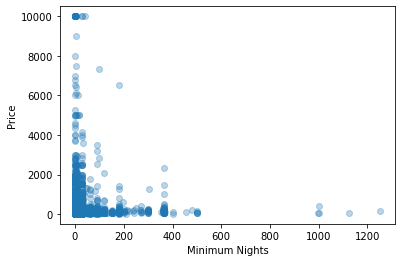

In [12]:
plt.scatter(airbnb.minimum_nights,airbnb.price,alpha=0.3)
plt.xlabel("Minimum Nights")
plt.ylabel("Price")

It seems that listings with lower minimum nights are able to charge higher prices. This doesn't mean that they have to or that there is any linear relationshp between minimum nights and price. But it is worth noting that all of the higher prices have a lower minimum night requirement.

Text(0, 0.5, 'Price')

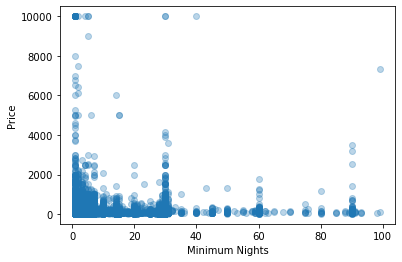

In [13]:
plt.scatter(airbnb.minimum_nights.where(airbnb.minimum_nights < 100),airbnb.price, alpha=0.3)
plt.xlabel("Minimum Nights")
plt.ylabel("Price")

Zooming in more on the opaque cluster where minimum nights is less than 100, the same trend continues. With a few exceptions, the higher prices seem to correlate with a lower minimum night requirement. The face that there is so much opacity further indicates that many listings have lower minimum night requirements.

Text(0, 0.5, 'Available Days for Next 30 Days')

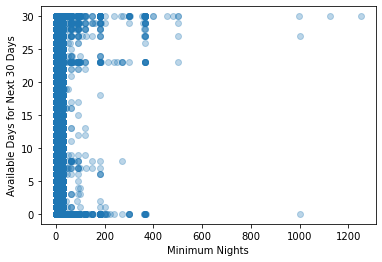

In [14]:
plt.scatter(airbnb.minimum_nights,airbnb.avail_l30d, alpha=0.3)
plt.xlabel("Minimum Nights")
plt.ylabel("Available Days for Next 30 Days")

Clearly this is a mess. But it's interesting to note that the listings with higher minimum night requirement seem to have higher availability- this indicates fewer bookings. We cannot speak about lower minimum night requirements, but we can recognize that the minimum night requirement cannot be the only indicator towards a listing's availability. There are clearly many low-night listings that are either completely booked or completely available.

# Questions for Reviewers

- Have the authors clearly stated what they have identified in their research?
- Is the formatting easy to follow?
- Do the connections made by the authors follow? Should more justifications be given?